** Description **

The data set provided here is related to credit card transactions. The objective of the challenge is to maximinise the anamolous transaction detection and at the same time reduce the false negatives (Falsely detecting a normal observation as anamolous). There are three fundamental approaches to detect anomalies; they are isolation, density and distance.

Most existing anomaly detection approaches, including classification-based methods [Abe et al. 2006; Shi and Horvath 2006], Replicator Neural Network (RNN) [Williams et al. 2002], one-class SVM [Tax and Duin 2004] and clustering-based methods [He et al. 2003],

• Their anomaly detection abilities are usually a ‘side-effect’ or by-product of an algorithm originally designed for a purpose other than anomaly detection (such as classification or clustering). This leads to two major drawbacks: (i) these approaches are not optimized to detect anomalies—as a consequence, these approaches often under-perform resulting in too many false alarms (having normal instances identified as anomalies) or too few anomalies being detected; (ii) many existing methods are constrained to low dimensional data and small data size because of the legacy of their original algorithms.

• Anomalies are ‘few and different’, which make them more susceptible to a mechanism we called Isolation. Anomalies are more likely to be isolated closer to the root of an iTree; whereas normal points are more likely to be isolated at the deeper end of an iTree.

• In isoforest algorithm, there are two training parameters and one evaluation parameter in this method: the training parameters are the number of trees to build and subsampling size; the evaluation parameter is the tree height limit during evaluation.

• Advantages: Exploit subsampling, do not use distance or density function, therefore reduces computational cost, linear time complexity, feasible with large data and many features.

** Isolation forest algorithm to score the observation and to detect anamoly **

In [1]:
import pandas as pd
import numpy as np
cc =  pd.read_csv("creditcard.csv")

In [2]:
print(cc.shape)
print(cc.columns)

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Since isolation forest is an unsupervised learning algorithm, it will only use feature data. 'cc_train' dataframe is created with only feature data. The label 'class' is dropped from the cc_train dataframe

In [3]:
cc_train= cc.drop('Class', axis=1)

There are two training parameters in this method: the training parameters are the number of trees to build and subsampling size (Liu and Ting, 2008). The are two hyperparameters which can be tunned to ajudt the algorithm. It must be noted that number of tree converges after a certain point. The default vale is 256 for sub sample size and 100 trees.

In [4]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=100, max_samples=200)

In [5]:
#Train the model with the data.
clf.fit(cc_train)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples=200, n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

Random and recursive partition of data is carried out, which is represented as a tree (random forest). The end of the tree is reached once the recursive partition of data is finished. It is expected that the distance taken to reach the outlier is far less than that for the normal data. The distance of the path is averaged and normalised to calculate the anomaly score. Anomaly score of 1 is considered as an outlier, values close to 0 is considered normal.

In [6]:
# The Anomaly scores are calclated for each observation and stored in 'scores_pred'
scores_pred = clf.decision_function(cc_train)

In [7]:
#verify the length of scores and number of obersvations.
print(len(scores_pred))
print(len(cc))

284807
284807


In [8]:
# scores_pred is added to the cc dataframe 
cc['scores']= scores_pred

In [10]:
# Based on (Liu and Ting, 2008), anomalous observation is scored close to 1 
# and non anamolous observations are scored close to zero. 
# simple loop that will count the number of observation that has score more than 0.5 and is actually anomalous.
counter =0
for n in range(len(cc)):
    if (cc['Class'][n]== 1 and cc['scores'][n] >=0.5):
        counter= counter+1
print (counter)

0


Clearly, there is something worg with the compatiblity of the algorithm. Lest investigate how the algorithm has scored each observation. Since we have the actual label, it is easy to compare the isolation score to the label.

In [12]:
# For convinience, divide the dataframe cc based on two labels. 
avg_count_0 = cc.loc[cc.Class==0]    #Data frame with normal observation
avg_count_1 = cc.loc[cc.Class==1]    #Data frame with anomalous observation

ERROR:root:Line magic function `%pylab.inline` not found.


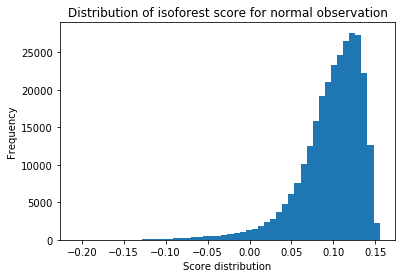

In [14]:
#Plot the combined distribution of the scores 
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%pylab.inline
normal = plt.hist(avg_count_0.scores, 50,)
plt.xlabel('Score distribution')
plt.ylabel('Frequency')
plt.title("Distribution of isoforest score for normal observation")
plt.show()

ERROR:root:Line magic function `%pylab.inline` not found.


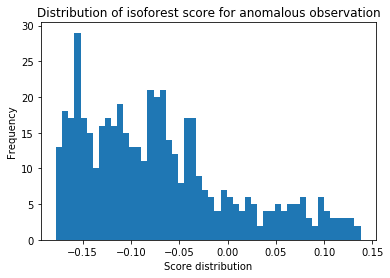

In [15]:
#Plot the combined distribution of the scores 
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%pylab.inline
normal = plt.hist(avg_count_1.scores, 50,)
plt.xlabel('Score distribution')
plt.ylabel('Frequency')
plt.title("Distribution of isoforest score for anomalous observation")
plt.show()

The above graph shows that the distribustion of the score assigned to anomalous and nonanomlous observations are not even. Most of the normal observations are scored more than +0.05 with a mean centered around 0.1. Whereas, distribution of the anomalous observations are spread from -0.1 to +0.5. Inorder to visualise it properly,  the histogram are drawn separately.

Liu and Ting (2008) suggests that for the normal observations, algorithm has a score of close to zero and anomalous observation has a score between 0.5 and 1. In this case, it is observed that the pattern of the scores are not consistent with the literature. The algorithm is calculating lower scores for anomalous observations.

In [ ]:
** Summary: **

It was observed that isoforest can be used as an unsupervised learning for anomaly detection.

In this particular case, isolation forest is not suitable because it tends to score less than 0.05 for anomalous observation. This is against what is proposed by (Liu and Ting, 2008).

This score can be used to carry out smote analysis. We can eliminate observations with score greater than 0.05 and increase the proposition of the minority class, significantly.